In [1]:
import os
import six
import glob
import pickle

import numpy as np
import pandas as pd

import p2pspatial
import pulse2percept.utils as p2pu

from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-01-29 14:47:51,084 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
results_dir = '../../results/single_stim/'
pickle_files = np.sort(glob.glob(os.path.join(results_dir, '*.pickle')))
pickle_files

array([ '../../results/single_stim/A-crossval-swarm_12-005_2018-01-24_01-09-42.pickle',
       '../../results/single_stim/A-crossval-swarm_51-009_2018-01-24_01-10-43.pickle',
       '../../results/single_stim/A-crossval-swarm_52-001_2018-01-24_01-11-32.pickle',
       '../../results/single_stim/B-crossval-swarm_12-005_2018-01-24_01-12-15.pickle',
       '../../results/single_stim/B-crossval-swarm_51-009_2018-01-24_01-13-00.pickle',
       '../../results/single_stim/B-crossval-swarm_52-001_2018-01-24_01-13-41.pickle',
       '../../results/single_stim/C-crossval-swarm_12-005_2018-01-24_08-27-58.pickle',
       '../../results/single_stim/C-crossval-swarm_51-009_2018-01-24_08-29-55.pickle',
       '../../results/single_stim/C-crossval-swarm_52-001_2018-01-24_08-30-55.pickle',
       '../../results/single_stim/D-crossval-swarm_12-005_2018-01-24_08-32-51.pickle',
       '../../results/single_stim/D-crossval-swarm_51-009_2018-01-24_08-33-57.pickle',
       '../../results/single_stim/D-crossv

In [3]:
subjects = ['12-005', '51-009', '52-001']
models = ['A', 'B', 'C', 'D', 'E', 'F']
assert_params = {
    'amplitude': 2.0,
    'w_scale': 20,
    'w_rot': 0,
    'w_dice': 80
}

In [4]:
def calc_srd(ytyp, assert_params):
    y_true, y_pred = ytyp
    return [p2pspatial.imgproc.srd_loss((yt, yp), w_scale=assert_params['w_scale'],
                                        w_rot=assert_params['w_rot'],
                                        w_dice=assert_params['w_dice'])
            for yt, yp in zip(y_true.iterrows(), y_pred.iterrows())]

In [5]:
mu = {a: {s: None for s in subjects} for a in models}
std = {a: {s: None for s in subjects} for a in models}

In [6]:
for file in pickle_files:
    y_test, y_pred, best_params, specifics = pickle.load(open(file, 'rb'))
    for key, value in six.iteritems(assert_params):
        assert np.isclose(specifics[key], value)
    n_folds = specifics['n_folds']
    assert len(y_pred) == n_folds
    assert len(y_test) == n_folds
    assert len(best_params) == n_folds
    model = specifics['modelname']
    subject = specifics['subject']
    if model not in models:
        print('Model %s found, skip.' % model)
        continue
    if subject not in subjects:
        print('Subject %s found, skip.' % subject)
        continue
    print('Processing Model %s, Subject %s' % (model, subject))
    
    losses = p2pu.parfor(calc_srd, zip(y_test, y_pred), func_args=[assert_params])
    losses = [item for sublist in losses for item in sublist]
    mu[model][subject] = np.mean(losses)
    std[model][subject] = np.std(losses)

Processing Model A, Subject 12-005
Processing Model A, Subject 51-009
Processing Model A, Subject 52-001
Processing Model B, Subject 12-005
Processing Model B, Subject 51-009
Processing Model B, Subject 52-001
Processing Model C, Subject 12-005
Processing Model C, Subject 51-009
Processing Model C, Subject 52-001
Processing Model D, Subject 12-005
Processing Model D, Subject 51-009
Processing Model D, Subject 52-001
Processing Model E, Subject 12-005
Processing Model E, Subject 51-009
Processing Model E, Subject 52-001
Processing Model F, Subject 12-005
Processing Model F, Subject 51-009
Processing Model F, Subject 52-001


In [7]:
mu

{'A': {'12-005': 27.178289061529021,
  '51-009': 46.333697133222479,
  '52-001': 34.013487541490655},
 'B': {'12-005': 24.659675505625295,
  '51-009': 41.455759654627748,
  '52-001': 30.981950724518292},
 'C': {'12-005': 23.598496887822563,
  '51-009': 30.316593084043646,
  '52-001': 30.764056758937613},
 'D': {'12-005': 24.831525118800943,
  '51-009': 33.611197053471578,
  '52-001': 31.044146313954947},
 'E': {'12-005': 23.876723689287068,
  '51-009': 29.906892051841726,
  '52-001': 31.119669762885049},
 'F': {'12-005': 24.395861314719465,
  '51-009': 32.039706651648764,
  '52-001': 30.756400851894735}}

In [8]:
std

{'A': {'12-005': 20.053829975994006,
  '51-009': 9.9420564111045877,
  '52-001': 25.770230634650176},
 'B': {'12-005': 19.886549915635566,
  '51-009': 11.372278474681149,
  '52-001': 26.235069952453451},
 'C': {'12-005': 18.27873735724619,
  '51-009': 8.9111082213784556,
  '52-001': 25.518898886773517},
 'D': {'12-005': 18.64105780424055,
  '51-009': 10.604162299580691,
  '52-001': 25.501555520191452},
 'E': {'12-005': 18.723702396516192,
  '51-009': 8.9777180738181759,
  '52-001': 24.717161464045255},
 'F': {'12-005': 18.571936729687827,
  '51-009': 9.349349502171739,
  '52-001': 25.549113783199061}}

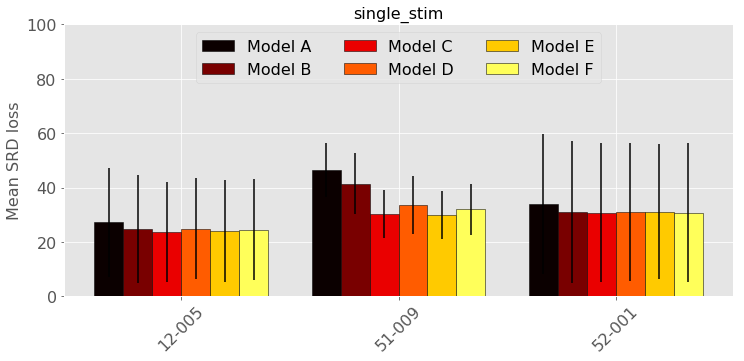

In [9]:
N = len(subjects)
width = 0.4 / N
ind = np.arange(N)

fig, ax = plt.subplots(figsize=(12, 5))
cm = plt.get_cmap('hot')

rects = {}
for m, model in enumerate(models):
    for s, subject in enumerate(subjects):
        thismu = mu[model][subject]
        thisstd = std[model][subject]
        if not thismu or not thisstd:
            continue
        r = ax.bar(s + m * width, thismu, width, yerr=thisstd, 
                   color=cm(m / len(models)), edgecolor='k', label='Model %s' % model)
        rects[model] = r[0]
ax.set_xticks(ind + (len(rects) - 1) / 2 * width)
ax.set_xticklabels(subjects, rotation=45, ha='center', fontsize=16)
ax.legend([rects[m] for m in models if m in rects],
          ['Model ' + m for m in models if m in rects], 
          ncol=3, loc='upper center', fontsize=16)
maxheight = max([list(filter(None, mu[m].values())) for m in models])[0]
ax.set_ylim(0, np.ceil(2 * maxheight / 20) * 20)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylabel('Mean SRD loss', fontsize=16)
ax.set_title(os.path.basename(os.path.dirname(results_dir)), fontsize=16)
fig.savefig(os.path.join(results_dir, 'srd_loss.png'))

In [ ]:
# metric = 'r2'
# weights = pd.Series(specifics['fit_params']['scoring_weights'])
# keys = ['all'] + list(np.sort(list(specifics['fit_params']['scoring_weights'])))
# print(keys)
# plt.style.use('ggplot')

# fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(14, 7))
# # plt.figure(figsize=(12, 6))

# N = len(subjects)
# width = 0.8 / N
# ind = np.arange(N)

# for key, ax in zip(keys, axes.ravel()):
#     rects = []
#     for m, model in enumerate(models):
#         mu = []
#         std = []
#         for subject in subjects:
#             y_true, y_pred, best_params, specifics = pickle.load(open(data[model][subject], 'rb'))
#             scores = p2pspatial.model_selection.crossval_score(y_true, y_pred, key=key,
#                                                                metric=metric,
#                                                                weights=weights)
#             mu.append(np.mean(scores))
#             std.append(np.std(scores))
# #         if m > 1:
# #             mu = [0, 0, 0]
# #             std = [0, 0, 0]
#         rects.append(ax.bar(ind + m * width, mu, width, yerr=std))
#     ax.set_xticks(ind + (len(models) - 1) / 2 * width)
#     ax.set_xticklabels(subjects, rotation=45, ha='center', fontsize=16)
#     ax.set_yticks(np.arange(-2, 1.01, 0.5))
#     ax.set_yticklabels(np.arange(-2, 1.01, 0.5), fontsize=16)
#     ax.set_title(key, fontsize=16)
#     ax.set_ylabel('$R^2$', fontsize=16)
# axes.ravel()[-1].axis('off')
# axes.ravel()[-1].legend([r[0] for r in rects], ['Model ' + mm for mm in models], loc='upper right', fontsize=16)
# plt.ylim(-2, 1)
# plt.tight_layout()
# plt.savefig('results-ABC.png')

In [10]:
# plt.figure(figsize=(12, 5))
# plt.subplot(121)
# plt.imshow(y_test[1].loc[1, 'image'])
# plt.subplot(122)
# plt.imshow(y_pred[1].loc[1, 'image'])